# **Discussion Analysis (Non Clipped Scores)**

In [ ]:
!conda install -c ejolly -c defaults -c conda-forge pymer4

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/linux-64::libmamba==1.5.2=had39da4_0
  - conda-forge/linux-64::libmambapy==1.5.2=py311hf2555c7_0
  - conda-forge/linux-64::libedit==3.1.20191231=he28a2e2_2
  - conda-forge/linux-64::mamba==1.5.2=py311h3072747_0
  - conda-forge/linux-64::krb5==1.21.2=h659d440_0
  - conda-forge/linux-64::libcurl==8.4.0=hca28451_0
  - conda-forge/linux-64::r-nlme==3.1_163=r43h61816a4_0
  - conda-forge/linux-64::r-rcurl==1.98_1.12=r43hf9611b0_3
  - conda-forge/linux-64::r-purrr==1.0.2=r43h57805ef_0
  - conda-forge/noarch::r-callr==3.7.3=r43hc72bb7e_1
  - conda-forge/noarch::r-jquerylib==0.1.4=r43hc72bb7e_2
  - conda-forge/noarch::r-irkernel==1.3.2=r43h785f33e_1
  - conda-forge/linux-64::r-rappdirs==0.3.3=r43h57805ef_2
  - conda-forge/linux-64::r-backports==1.4.1=r43h57805ef_2
  - conda-forge/noarch::r-pkgconfig==2.0.3=r43hc72bb7e_3
  - conda

In [1]:
!pip install pymer4
!pip install polars
!pip install great_tables
!pip install -U typing_extensions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, norm
from pymer4.models import Lmer


PackageNotInstalledError: The R package "lme4" is not installed.

## **Import Data**

In [4]:
scores = "non_clipped"

In [5]:
interactions = pd.read_csv(f"../../data/analysis_data/interactions_{scores}.csv")
mod_interactions = pd.read_csv(f"../../data/analysis_data/mod_interactions_{scores}.csv")
interactions_all = pd.read_csv(f"../../data/analysis_data/interactions_all_{scores}.csv")

interactions

/tmp/ipykernel_359/1063899328.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactions = pd.read_csv(f"../../data/analysis_data/interactions_{scores}.csv")
/tmp/ipykernel_359/1063899328.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactions_all = pd.read_csv(f"../../data/analysis_data/interactions_all_{scores}.csv")


msg_id_parent msg_id_child submission_id     subreddit  \
0             c7ecp8d      c7ecs2n        14m325  Ask_Politics   
1             c7ecp8d      c7ecxpk        14m325  Ask_Politics   
2             c7ecp8d      c7eflag        14m325  Ask_Politics   
3             c7efx8q      c7ejh1d        14m325  Ask_Politics   
4             c7efx8q      c7f8140        14m325  Ask_Politics   
...               ...          ...           ...           ...   
1627406       kfkh5ib      kfmd52k       18uirzt      politics   
1627407       kfklsb6      kforzbx       18uirzt      politics   
1627408       kfmq5kr      kfp6tzv       18uirzt      politics   
1627409       kfp3d4v      kfp8xh8       18uirzt      politics   
1627410       kfkiulh      kfpvec4       18uirzt      politics   

                      exact_time_child    author_child    author_parent  \
0                         1355166551.0       karmanaut     ramblin_dash   
1                         1355167049.0    zoolander951     ramblin_dash   
2                         1355175187.0         zossima     ramblin_dash   
3                         1355187644.0    fathermocker  senatorskeletor   
4                         1355286254.0          pkmkii  senatorskeletor   
...                                ...             ...              ...   
1627406  1970-01-01 00:00:01.703977996   knightforlife   freddiethebaer   
1627407  1970-01-01 00:00:01.704023024  bakerfredricka       4blockhead   
1627408  1970-01-01 00:00:01.704032059       glassjar1       doubletfan   
1627409  1970-01-01 00:00:01.704033069     haulinboats       4blockhead   
1627410  1970-01-01 00:00:01.704042289        smegheid  schwarzes__loch   

        author_submission  finetuned_child_E_norm  finetuned_child_I_norm  \
0               karmanaut                0.053025                0.072843   
1               karmanaut                0.040605                0.001874   
2               karmanaut                0.037034               -0.026841   
3               karmanaut                0.046751                0.040446   
4               karmanaut                0.029991               -0.043360   
...                   ...                     ...                     ...   
1627406          optimalg                0.289315                0.222072   
1627407          optimalg                0.192579                0.210383   
1627408          optimalg                0.078374                0.101258   
1627409          optimalg                0.137089                0.224533   
1627410          optimalg               -0.025845               -0.075891   

         ...  mean_EMI_interaction_sb_EMI_z  mean_EMI_interaction_sb_z_EMI  \
0        ...                       0.355153                       0.306327   
1        ...                       0.368204                       0.318487   
2        ...                       0.718835                       0.612462   
3        ...                       0.126254                       0.100198   
4        ...                       0.438123                       0.371227   
...      ...                            ...                            ...   
1627406  ...                       0.986940                       0.780210   
1627407  ...                       0.528504                       0.391975   
1627408  ...                       0.051980                       0.059937   
1627409  ...                      -0.250893                      -0.290990   
1627410  ...                       1.037299                       0.930100   

         ideology_group  emi_group  emi_alignment  ideology_alignment  \
0               PR & CR    PE & CI      Different                Same   
1               PR & CR    PE & CE           Same                Same   
2               PR & CL    PE & CE           Same           Different   
3               PR & CL    PE & CE           Same           Different   
4               PR & CL    PE & CE           Same           Different   
...           

## **H1: Submissions Impact on Comment and Interaction**


In [6]:
def majority_or_amb(labels):
    value_counts = labels.value_counts()
    if (value_counts == value_counts.max()).sum() > 1:
        return "amb"
    return value_counts.idxmax()


result_all_submission = (
    interactions_all.groupby("submission_id")
    .agg(
        nr_of_comments=("msg_id_parent", "count"),
        ft_EMI_z_submission_EMI=("finetuned_submission_len_EMI_z_trans", "first"),
        #ft_z_EMI_submission_EMI=("finetuned_submission_len_norm_z_trans_EMI", "first"),
        ft_EMI_z_mean_comment_EMI=("finetuned_parent_len_EMI_z_trans", "mean"),
        #ft_z_EMI_mean_comment_EMI=("finetuned_parent_len_norm_z_trans_EMI", "mean"),
        ft_EMI_z_mean_interact_EMI=("mean_EMI_interaction_ft_EMI_z", "mean"),
        label = ("predictions_ft", majority_or_amb)
    )
    .reset_index()
)


result_human_submission = (
    interactions.groupby("submission_id")
    .agg(
        nr_of_comments=("msg_id_parent", "count"),
        ft_EMI_z_submission_EMI=("finetuned_submission_len_EMI_z_trans", "first"),
        #ft_z_EMI_submission_EMI=("finetuned_submission_len_norm_z_trans_EMI", "first"),
        ft_EMI_z_mean_comment_EMI=("finetuned_parent_len_EMI_z_trans", "mean"),
        #ft_z_EMI_mean_comment_EMI=("finetuned_parent_len_norm_z_trans_EMI", "mean"),
        ft_EMI_z_mean_interact_EMI=("mean_EMI_interaction_ft_EMI_z", "mean"),
        label = ("predictions_ft", majority_or_amb)
    )
    .reset_index()
)

result_mods_submission = (
    mod_interactions.groupby("submission_id")
    .agg(
        nr_of_comments=("msg_id_parent", "count"),
        ft_EMI_z_submission_EMI=("finetuned_submission_len_EMI_z_trans", "first"),
        #ft_z_EMI_submission_EMI=("finetuned_submission_len_norm_z_trans_EMI", "first"),
        ft_EMI_z_mean_comment_EMI=("finetuned_parent_len_EMI_z_trans", "mean"),
        #ft_z_EMI_mean_comment_EMI=("finetuned_parent_len_norm_z_trans_EMI", "mean"),
        ft_EMI_z_mean_interact_EMI=("mean_EMI_interaction_ft_EMI_z", "mean"),
        label = ("predictions_ft", majority_or_amb)
    )
    .reset_index()
)


In [5]:
result_human_submission

submission_id  nr_of_comments  ft_EMI_z_submission_EMI  \
0           1001a3h              30                -0.584611   
1            1001mh               2                 0.522836   
2           1003k02              65                -1.131063   
3           10045jv               7                 0.422146   
4            1004fx               2                -1.040226   
...             ...             ...                      ...   
98755         zzlqg               2                 1.127682   
98756         zzmjp               1                -0.848453   
98757         zznjb               1                 0.866848   
98758         zzpai               1                 0.337770   
98759         zzssj               7                -1.752369   

       ft_EMI_z_mean_comment_EMI  ft_EMI_z_mean_interact_EMI            label  
0                       0.574257                    0.260674  no_disagreement  
1                       0.997137                    1.120172              amb  
2                      -0.879966                   -0.674479  no_disagreement  
3                       0.001573                    0.270835  no_disagreement  
4                      -0.285864                   -0.146556  no_disagreement  
...                          ...                         ...              ...  
98755                   1.506575                    1.366014  no_disagreement  
98756                   0.450827                    0.248993         disagree  
98757                  -0.461530                    0.350155  no_disagreement  
98758                   1.027653                    1.095874         disagree  
98759                  -0.378120                   -0.432288  no_disagreement  

[98760 rows x 6 columns]

### **Correlations**

In [7]:
# are more I based discussions more active? 
# correlation of nr. of comments to submissions EMI score

# if no, check most active's vs. least actives mean EMI difference
# and most E and I extremes mean activity

result_all_submission[["nr_of_comments", "ft_EMI_z_submission_EMI", "ft_EMI_z_mean_comment_EMI", "ft_EMI_z_mean_interact_EMI"]].corr()

nr_of_comments  ft_EMI_z_submission_EMI  \
nr_of_comments                    1.000000                 0.046067   
ft_EMI_z_submission_EMI           0.046067                 1.000000   
ft_EMI_z_mean_comment_EMI        -0.011003                 0.453084   
ft_EMI_z_mean_interact_EMI       -0.010854                 0.481847   

                            ft_EMI_z_mean_comment_EMI  \
nr_of_comments                              -0.011003   
ft_EMI_z_submission_EMI                      0.453084   
ft_EMI_z_mean_comment_EMI                    1.000000   
ft_EMI_z_mean_interact_EMI                   0.903569   

                            ft_EMI_z_mean_interact_EMI  
nr_of_comments                               -0.010854  
ft_EMI_z_submission_EMI                       0.481847  
ft_EMI_z_mean_comment_EMI                     0.903569  
ft_EMI_z_mean_interact_EMI                    1.000000

In [8]:
result_mods_submission[["nr_of_comments", "ft_EMI_z_submission_EMI", "ft_EMI_z_mean_comment_EMI", "ft_EMI_z_mean_interact_EMI"]].corr()

nr_of_comments  ft_EMI_z_submission_EMI  \
nr_of_comments                    1.000000                -0.135806   
ft_EMI_z_submission_EMI          -0.135806                 1.000000   
ft_EMI_z_mean_comment_EMI        -0.115450                 0.382975   
ft_EMI_z_mean_interact_EMI       -0.088920                 0.404118   

                            ft_EMI_z_mean_comment_EMI  \
nr_of_comments                              -0.115450   
ft_EMI_z_submission_EMI                      0.382975   
ft_EMI_z_mean_comment_EMI                    1.000000   
ft_EMI_z_mean_interact_EMI                   0.939047   

                            ft_EMI_z_mean_interact_EMI  
nr_of_comments                               -0.088920  
ft_EMI_z_submission_EMI                       0.404118  
ft_EMI_z_mean_comment_EMI                     0.939047  
ft_EMI_z_mean_interact_EMI                    1.000000

In [9]:
result_human_submission[["nr_of_comments", "ft_EMI_z_submission_EMI", "ft_EMI_z_mean_comment_EMI", "ft_EMI_z_mean_interact_EMI"]].corr()

nr_of_comments  ft_EMI_z_submission_EMI  \
nr_of_comments                    1.000000                 0.041520   
ft_EMI_z_submission_EMI           0.041520                 1.000000   
ft_EMI_z_mean_comment_EMI        -0.015699                 0.455285   
ft_EMI_z_mean_interact_EMI       -0.015774                 0.484360   

                            ft_EMI_z_mean_comment_EMI  \
nr_of_comments                              -0.015699   
ft_EMI_z_submission_EMI                      0.455285   
ft_EMI_z_mean_comment_EMI                    1.000000   
ft_EMI_z_mean_interact_EMI                   0.903471   

                            ft_EMI_z_mean_interact_EMI  
nr_of_comments                               -0.015774  
ft_EMI_z_submission_EMI                       0.484360  
ft_EMI_z_mean_comment_EMI                     0.903471  
ft_EMI_z_mean_interact_EMI                    1.000000

* slightly positive correlation: more E based submission slightly more comments
* BUT mod distorted?



In [33]:
def plot_sub_emi_vs_interact_emi(df_human, df_mod, df_all,
                                 x_col, y_col, header_input,
                                 filter_mode = "mean",
                                 filter_col = "nr_of_comments",
                                 filter_type = "Submissions",
                                 quantile = 0.8,
                                 save_path="plots/Scatter_Submissions_EMI_Interactions_EMI.png"):
    """
    Impact of submissions EMI on Interactions EMI 
    """

    # Filter active discussions
    if filter_mode == 'mean':
        df_human_active = df_human[df_human[filter_col] >= df_human[filter_col].mean()]
        df_mod_active = df_mod[df_mod[filter_col] >= df_mod[filter_col].mean()]
        df_all_active = df_all[df_all[filter_col] >= df_all[filter_col].mean()]
        filter_title = f"{filter_type} with More than Average {header_input}"
    elif filter_mode == 'quantile':
        df_human_active = df_human[df_human[filter_col] >= df_human[filter_col].quantile(quantile)]
        df_mod_active = df_mod[df_mod[filter_col] >=df_mod[filter_col].quantile(quantile)]
        df_all_active = df_all[df_all[filter_col] >= df_all[filter_col].quantile(quantile)]
        filter_title = f"{filter_type} with Top {int(quantile * 100)}% {header_input} Count"
    elif filter_mode == "None":
        df_human_active = df_human.copy()
        df_mod_active = df_mod.copy()
        df_all_active = df_all.copy()
        filter_title = f"All {filter_type}"
    else:
        raise ValueError("filter_mode must be 'mean' or 'quantile'")

    
    fig, axes = plt.subplots(1, 3, figsize=(25, 12), sharex=True, sharey=True)
    fig.suptitle(f"Relation of {filter_type} EMI Score and {header_input} Mean EMI Score\n{filter_title}", fontsize=20)

    # Shared plotting logic
    datasets = [
        ("Human Started Interactions", df_human, df_human_active, axes[0], (len(df_human) / len(df_all)) * 100),
        ("Moderator Started Interactions", df_mod, df_mod_active, axes[1], (len(df_mod) / len(df_all)) * 100),
        ("All Interactions", df_all, df_all_active, axes[2], None)
    ]

    for title, base_data, active_data, ax, percent in datasets:
        #share_disagree = len(base_data[base_data['predictions_ft'] == "disagree"]) / len(base_data)

        sns.regplot(
            data=active_data,
            x=x_col, y=y_col, ax=ax,
            #label=f'Disagree ({share_disagree*100:.1f}%)',
            scatter_kws={'alpha': 0.3},
            line_kws={'color': 'red'}
        )

        valid_data = active_data[[x_col, y_col]].replace([np.inf, -np.inf], np.nan).dropna()
        if len(valid_data) >= 2:
            r, _ = pearsonr(valid_data[x_col], valid_data[y_col])
            ax.annotate(f"r = {r:.2f}", xy=(0.05, 0.95), xycoords='axes fraction', fontsize=18,
                        ha='left', va='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))
        else:
            ax.annotate("r = N/A", xy=(0.05, 0.95), xycoords='axes fraction', fontsize=18,
                        ha='left', va='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

        ax.set_xlabel(f"{filter_type} EMI Score", fontsize=18)
        ax.set_ylabel(f"{header_input} EMI Score", fontsize=18)
        if percent is not None:
            ax.set_title(f"{title} ({percent:.2f}%)", fontsize=18)
        else:
            ax.set_title(f"{title}, #{len(base_data)}", fontsize=18)
        ax.legend()
        ax.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.savefig(save_path, dpi=600)
    plt.show()

### **Submissions and Interactions**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


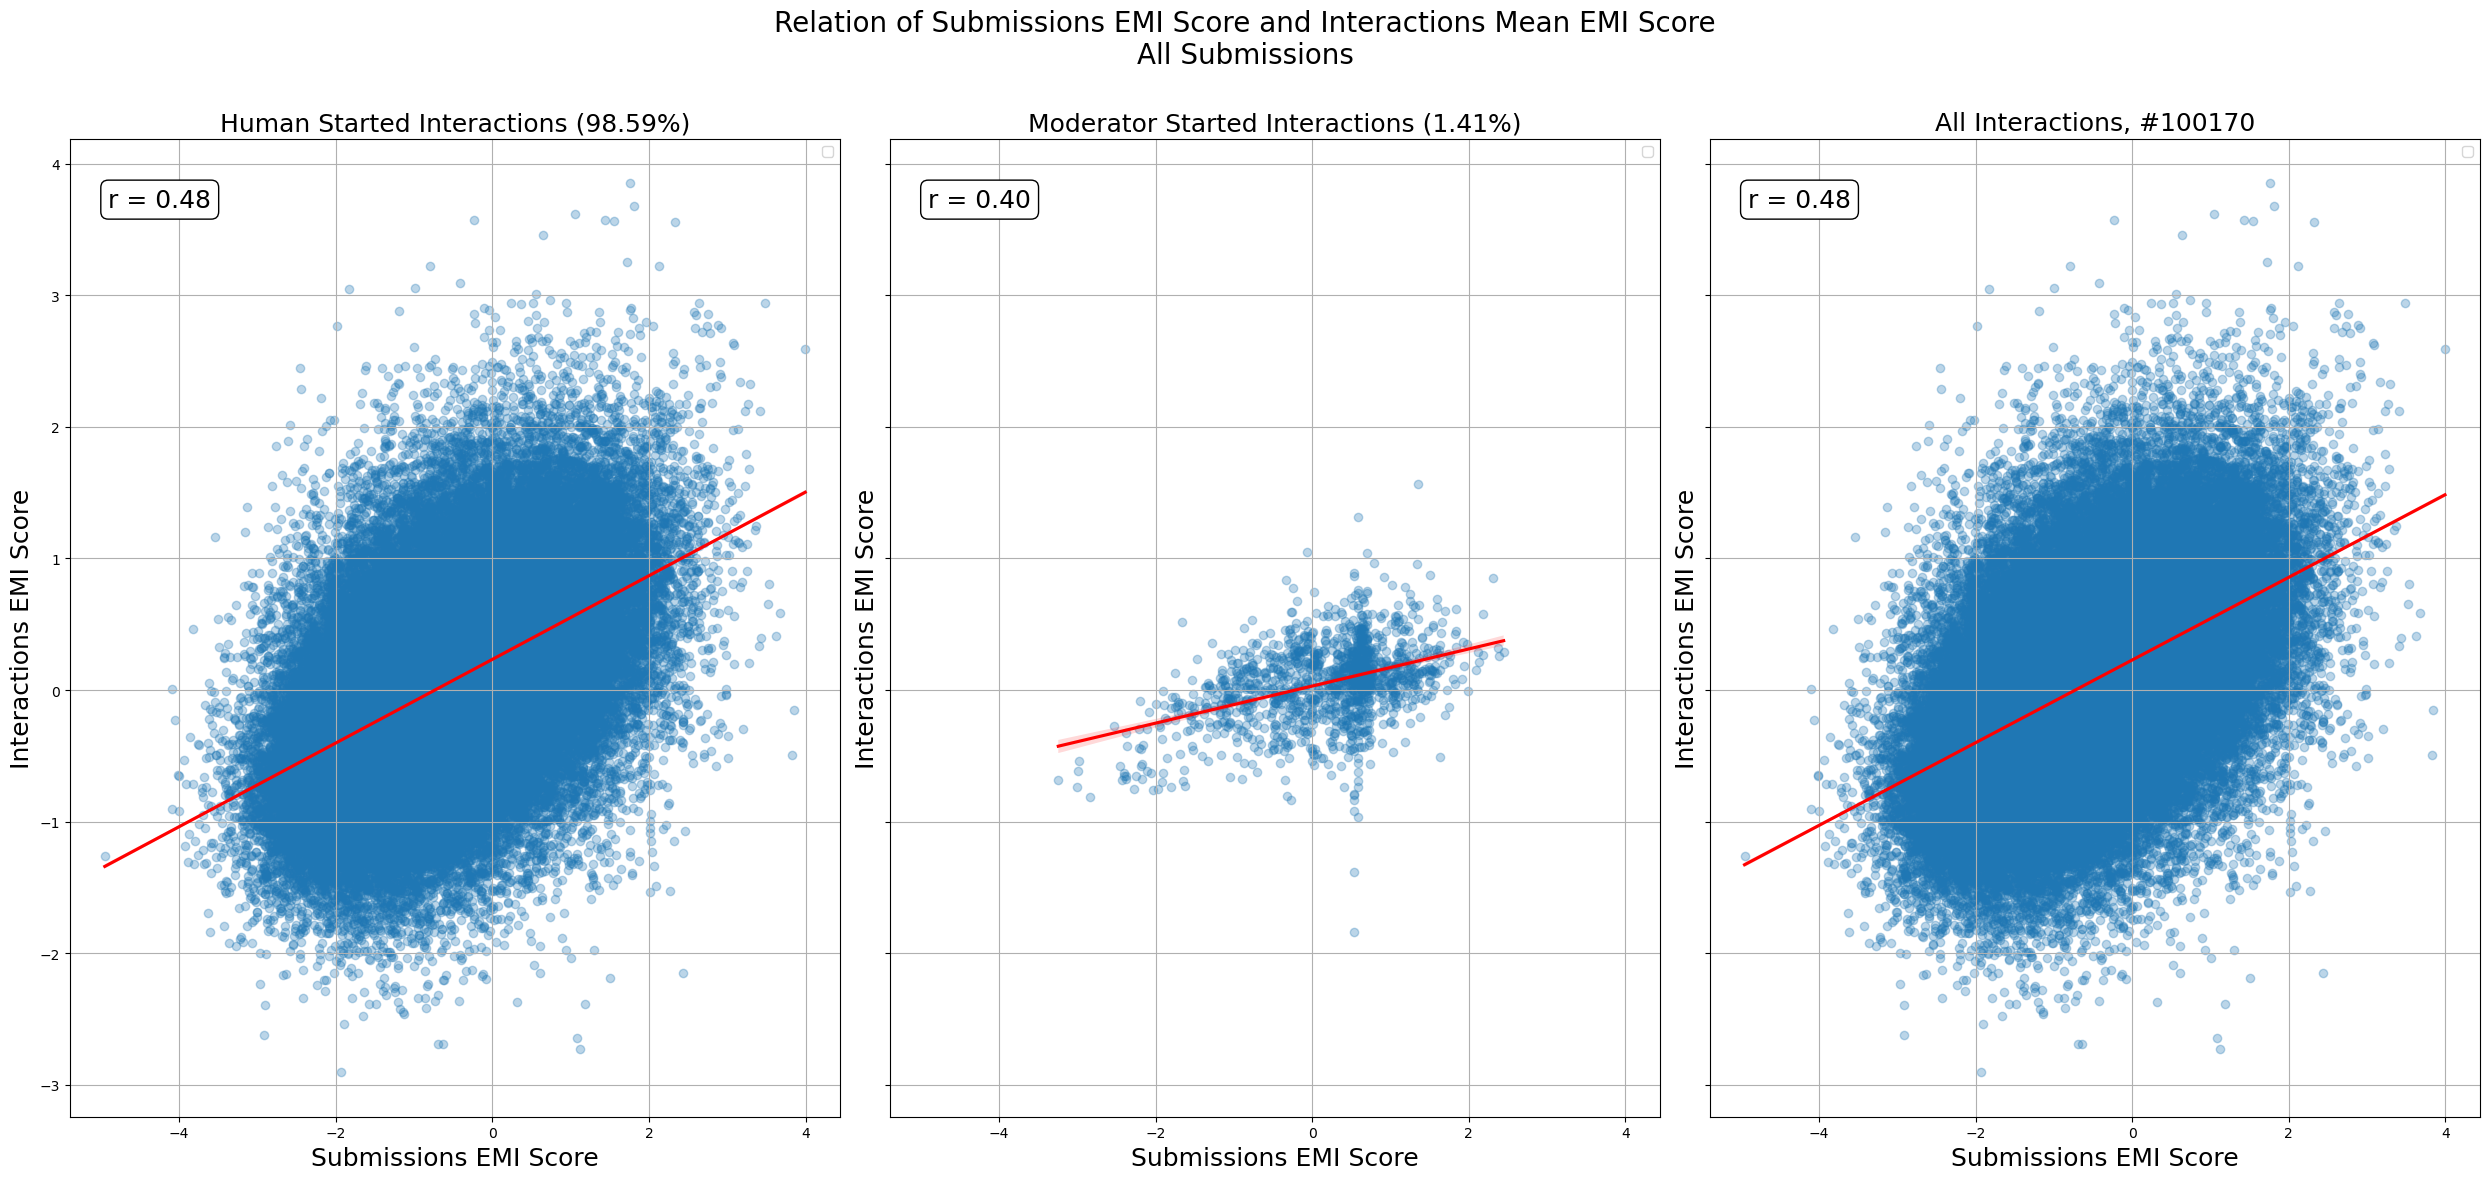

In [67]:
plot_sub_emi_vs_interact_emi(result_human_submission, result_mods_submission, result_all_submission,
                             "ft_EMI_z_submission_EMI", "ft_EMI_z_mean_interact_EMI", header_input = "Interactions",
                             filter_mode = "None",
                             save_path="plots/Scatter_Submissions_EMI_Interactions_EMI.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


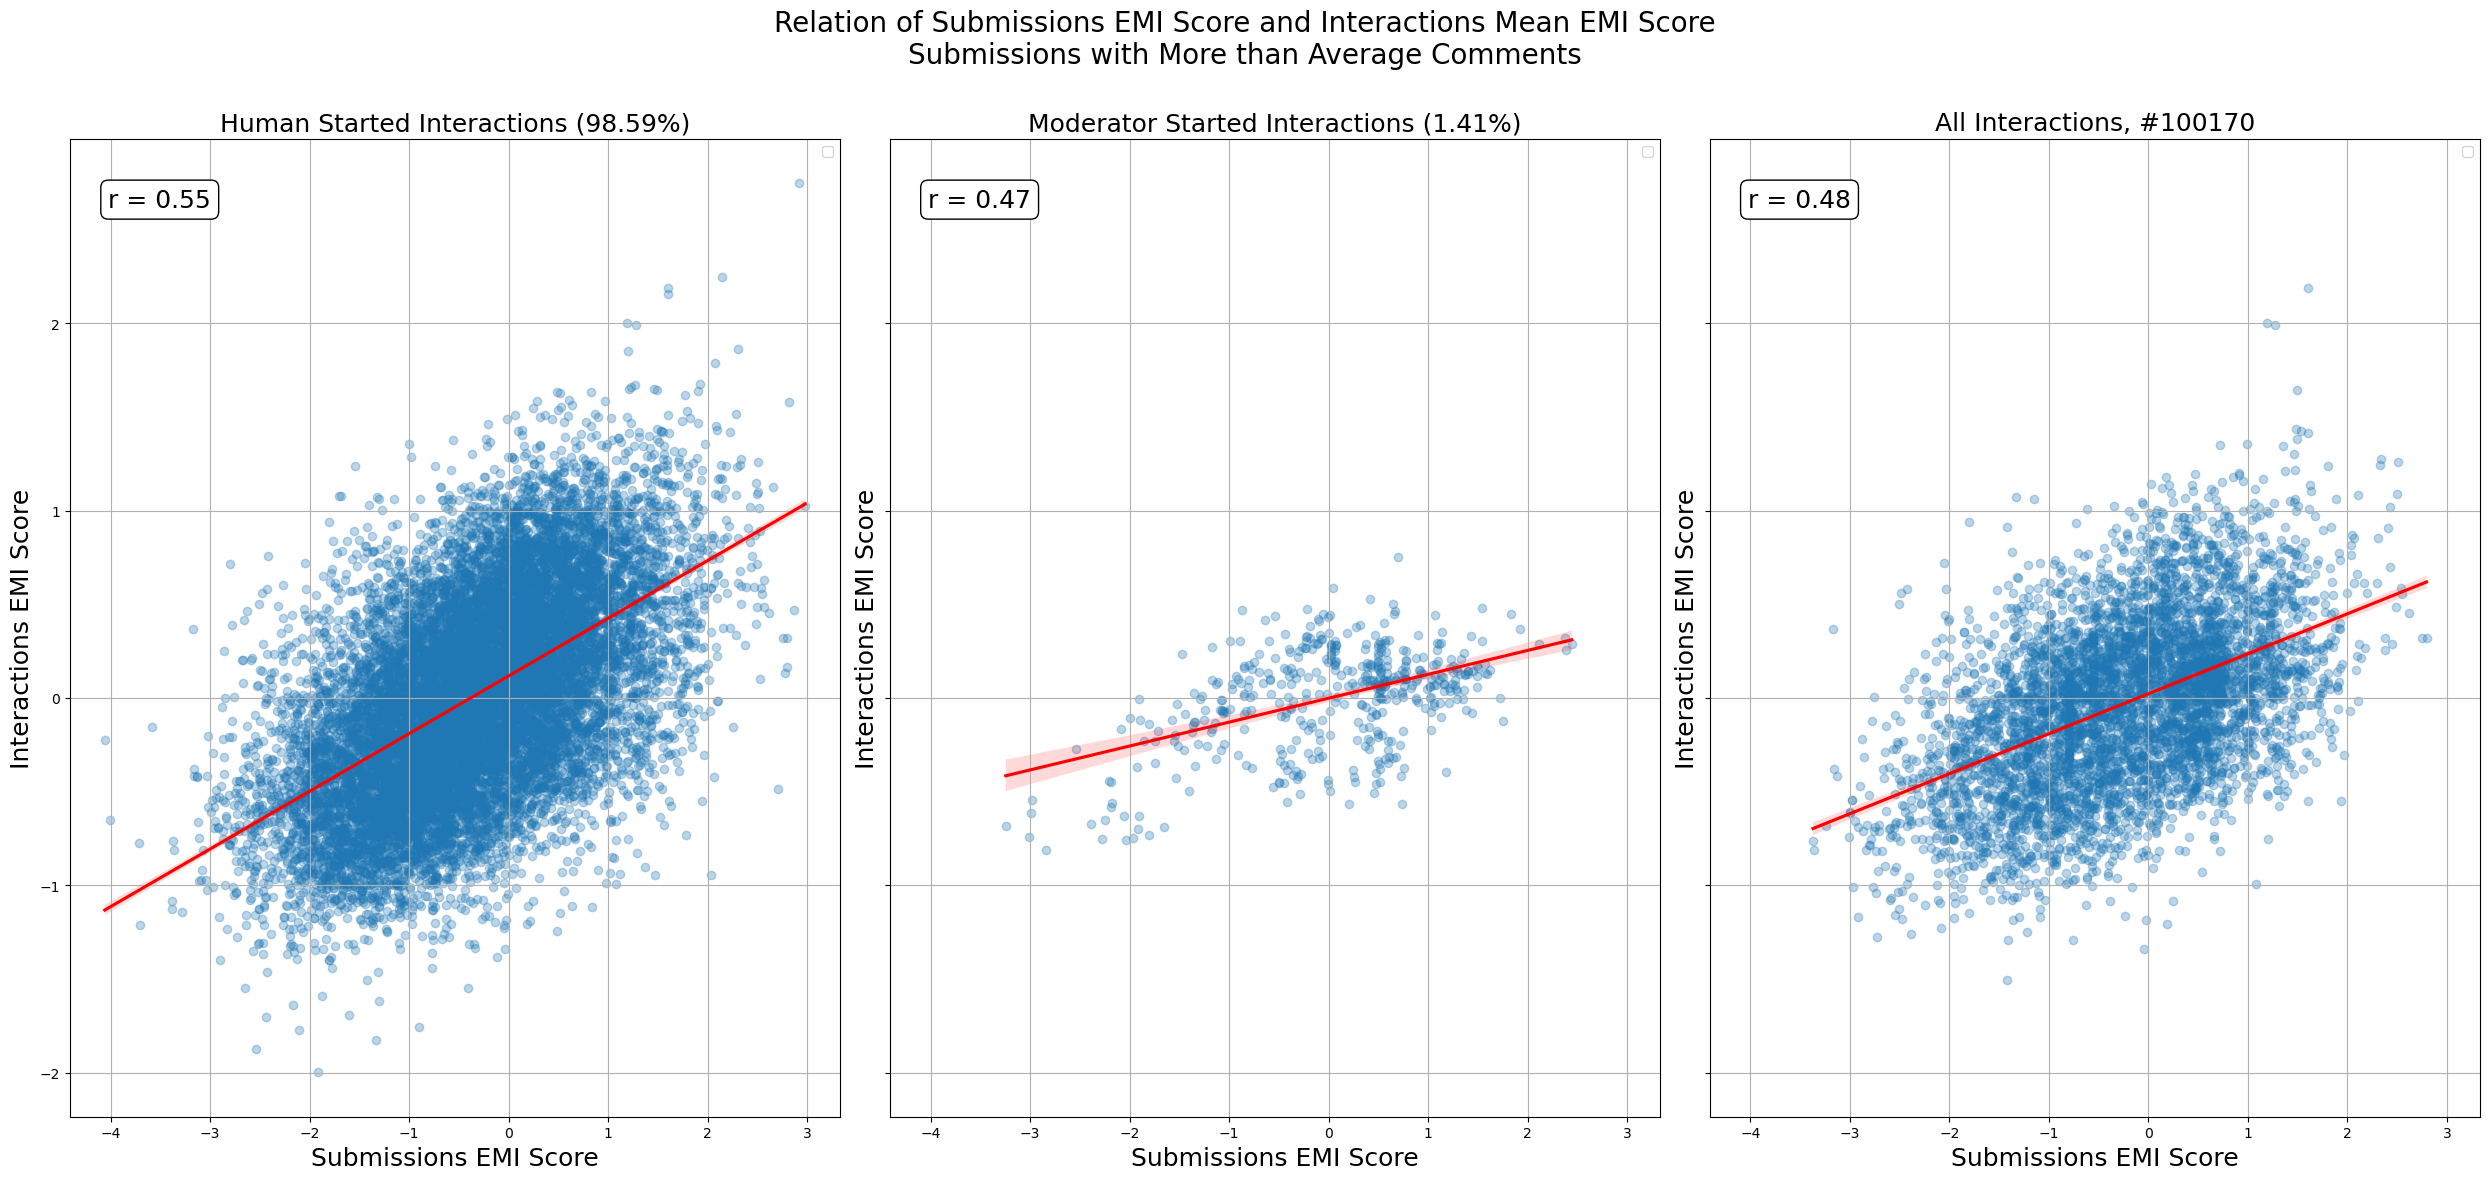

In [56]:
plot_sub_emi_vs_interact_emi(result_human_submission, result_mods_submission, result_all_submission,
                             "ft_EMI_z_submission_EMI", "ft_EMI_z_mean_interact_EMI", header_input = "Interactions",
                             filter_mode = "mean",
                             save_path="plots/Scatter_Submissions_EMI_Interactions_EMI_meanActivity.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


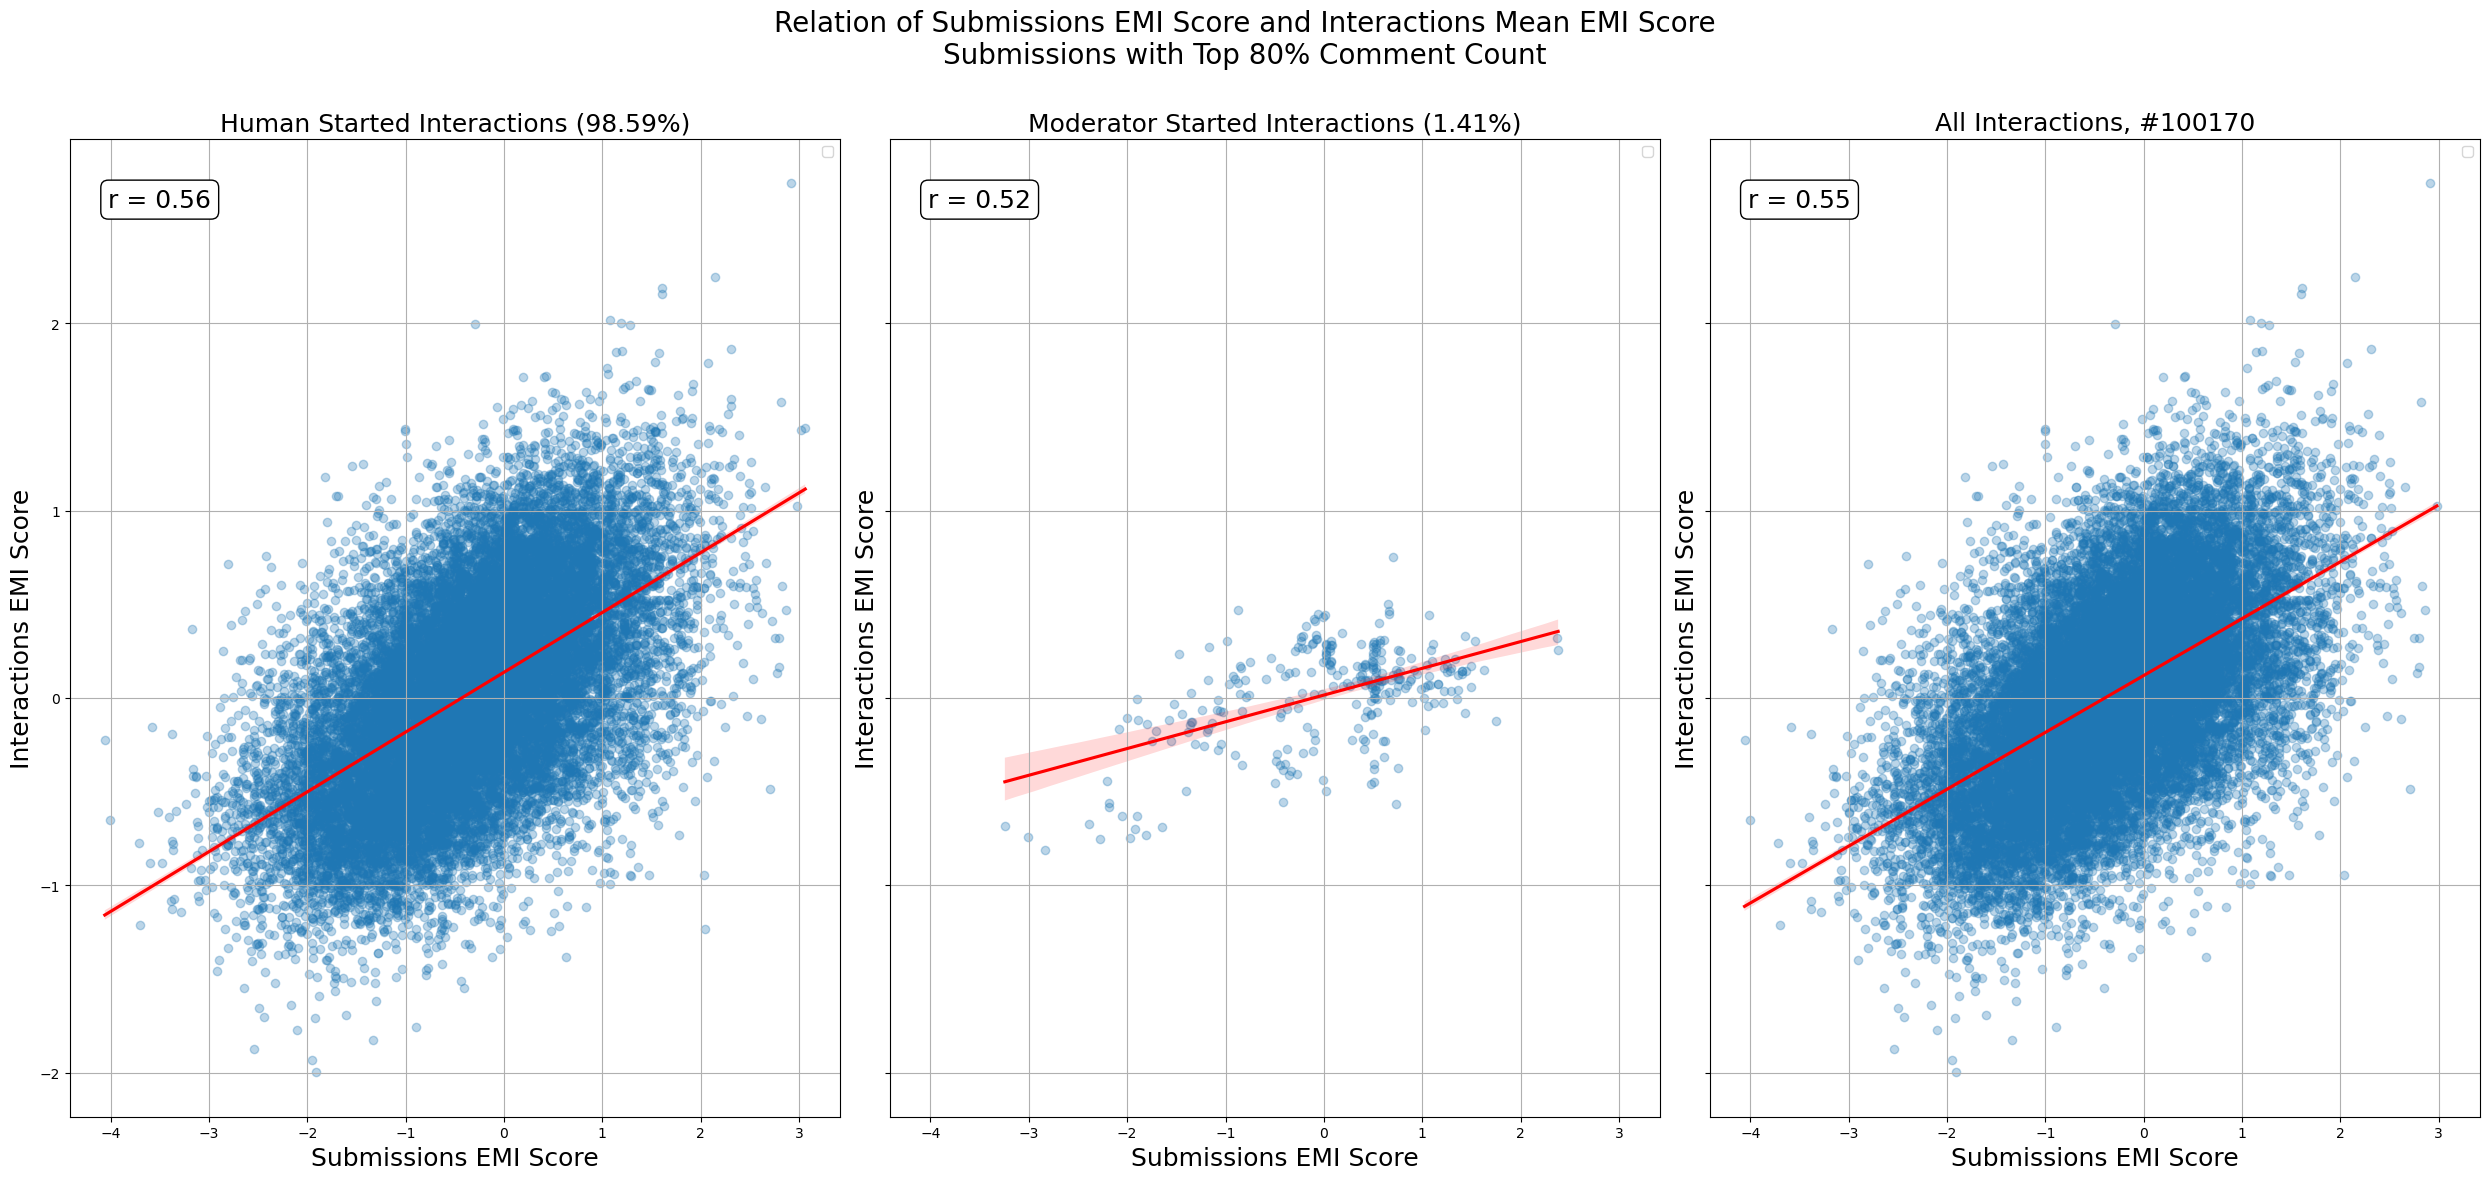

In [58]:
plot_sub_emi_vs_interact_emi(result_human_submission, result_mods_submission, result_all_submission,
                             "ft_EMI_z_submission_EMI", "ft_EMI_z_mean_interact_EMI", header_input = "Interactions",
                             filter_mode = "quantile", quantile = 0.8,
                             save_path="plots/Scatter_Submissions_EMI_Interactions_EMI_q8_Activity.png")

In [119]:
def plot_correlation_by_activity_quantile(
    human_data, mod_data, all_data,
    x_col = "ft_EMI_z_submission_EMI", y_col =  "ft_EMI_z_mean_interact_EMI",
    quantiles=np.linspace(0, 1, 11),
    filter_col = "nr_of_coments", filter_type = "Comments",
    header = "Correlation Between EMI Score and Disagreement Share by Activity Quantile",
    save_path = "plots/Correlation_by_Activity_Quantile.pdf"
):
    results = []

    for q in quantiles:
        # Apply quantile filtering
        def filter_by_quantile(df, q_val):
            if q_val == 0:
                return df.copy()
            return df[df[filter_col] >= df[filter_col].quantile(q_val)]

        df_human_active = filter_by_quantile(human_data, q)
        df_mod_active = filter_by_quantile(mod_data, q)
        df_all_active = filter_by_quantile(all_data, q)

        # Define helper to compute correlation safely
        def get_corr(df):
            valid = df[[x_col, y_col]].replace([np.inf, -np.inf], np.nan).dropna()
            if len(valid) >= 2:
                return pearsonr(valid[x_col], valid[y_col])[0]
            return np.nan

        results.extend([
            {"Quantile": q, "Correlation": get_corr(df_human_active), "Group": "Humans"},
            {"Quantile": q, "Correlation": get_corr(df_mod_active), "Group": "Mods"},
            {"Quantile": q, "Correlation": get_corr(df_all_active), "Group": "All"},
        ])

    # Create DataFrame
    result_df = pd.DataFrame(results)

    color_dict = {"Mods": "salmon",
                  "Humans" : "steelblue",
                  "All" : "green"}

    # Plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=result_df, x="Quantile", y="Correlation", hue="Group", palette = color_dict, alpha = 0.7, marker="o")
    plt.title(header)
    plt.xlabel(f"Activity Quantile Threshold (Min % of {filter_type} Activity)")
    plt.ylabel("Pearson Correlation (r)")
    plt.ylim(0.35, 0.65)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

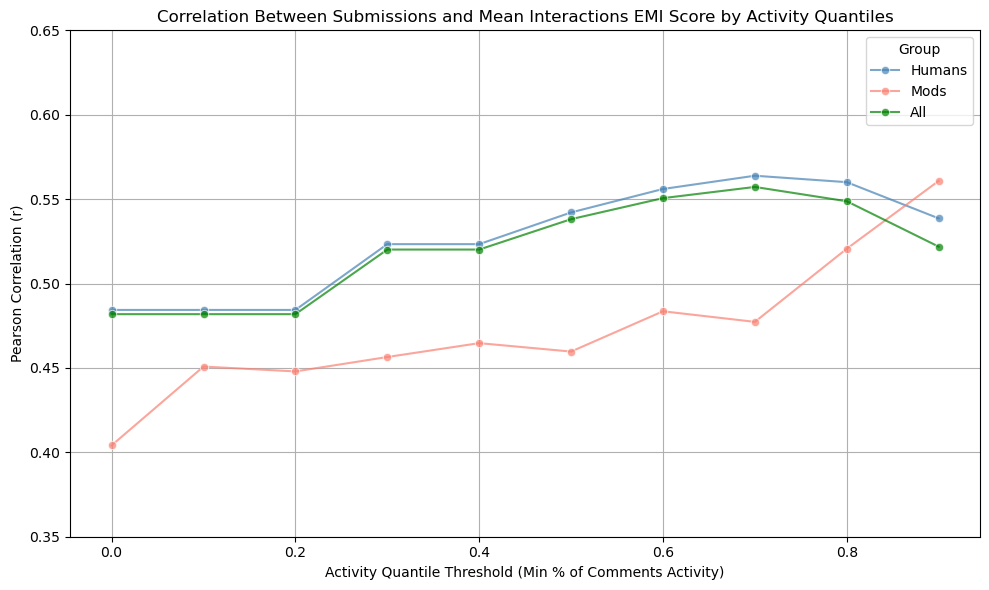

In [120]:
plot_correlation_by_activity_quantile(
    result_human_submission, result_mods_submission, result_all_submission,
    x_col = "ft_EMI_z_submission_EMI", y_col =  "ft_EMI_z_mean_interact_EMI",
    quantiles=np.linspace(0, 1, 11),
    filter_col = "nr_of_comments", filter_type = "Comments",
    header = "Correlation Between Submissions and Mean Interactions EMI Score by Activity Quantiles",
    save_path = "plots/Correlation_Subm_Interact_EMI_by_Activity_Quantile.pdf"
)

### **Submission and Comment**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


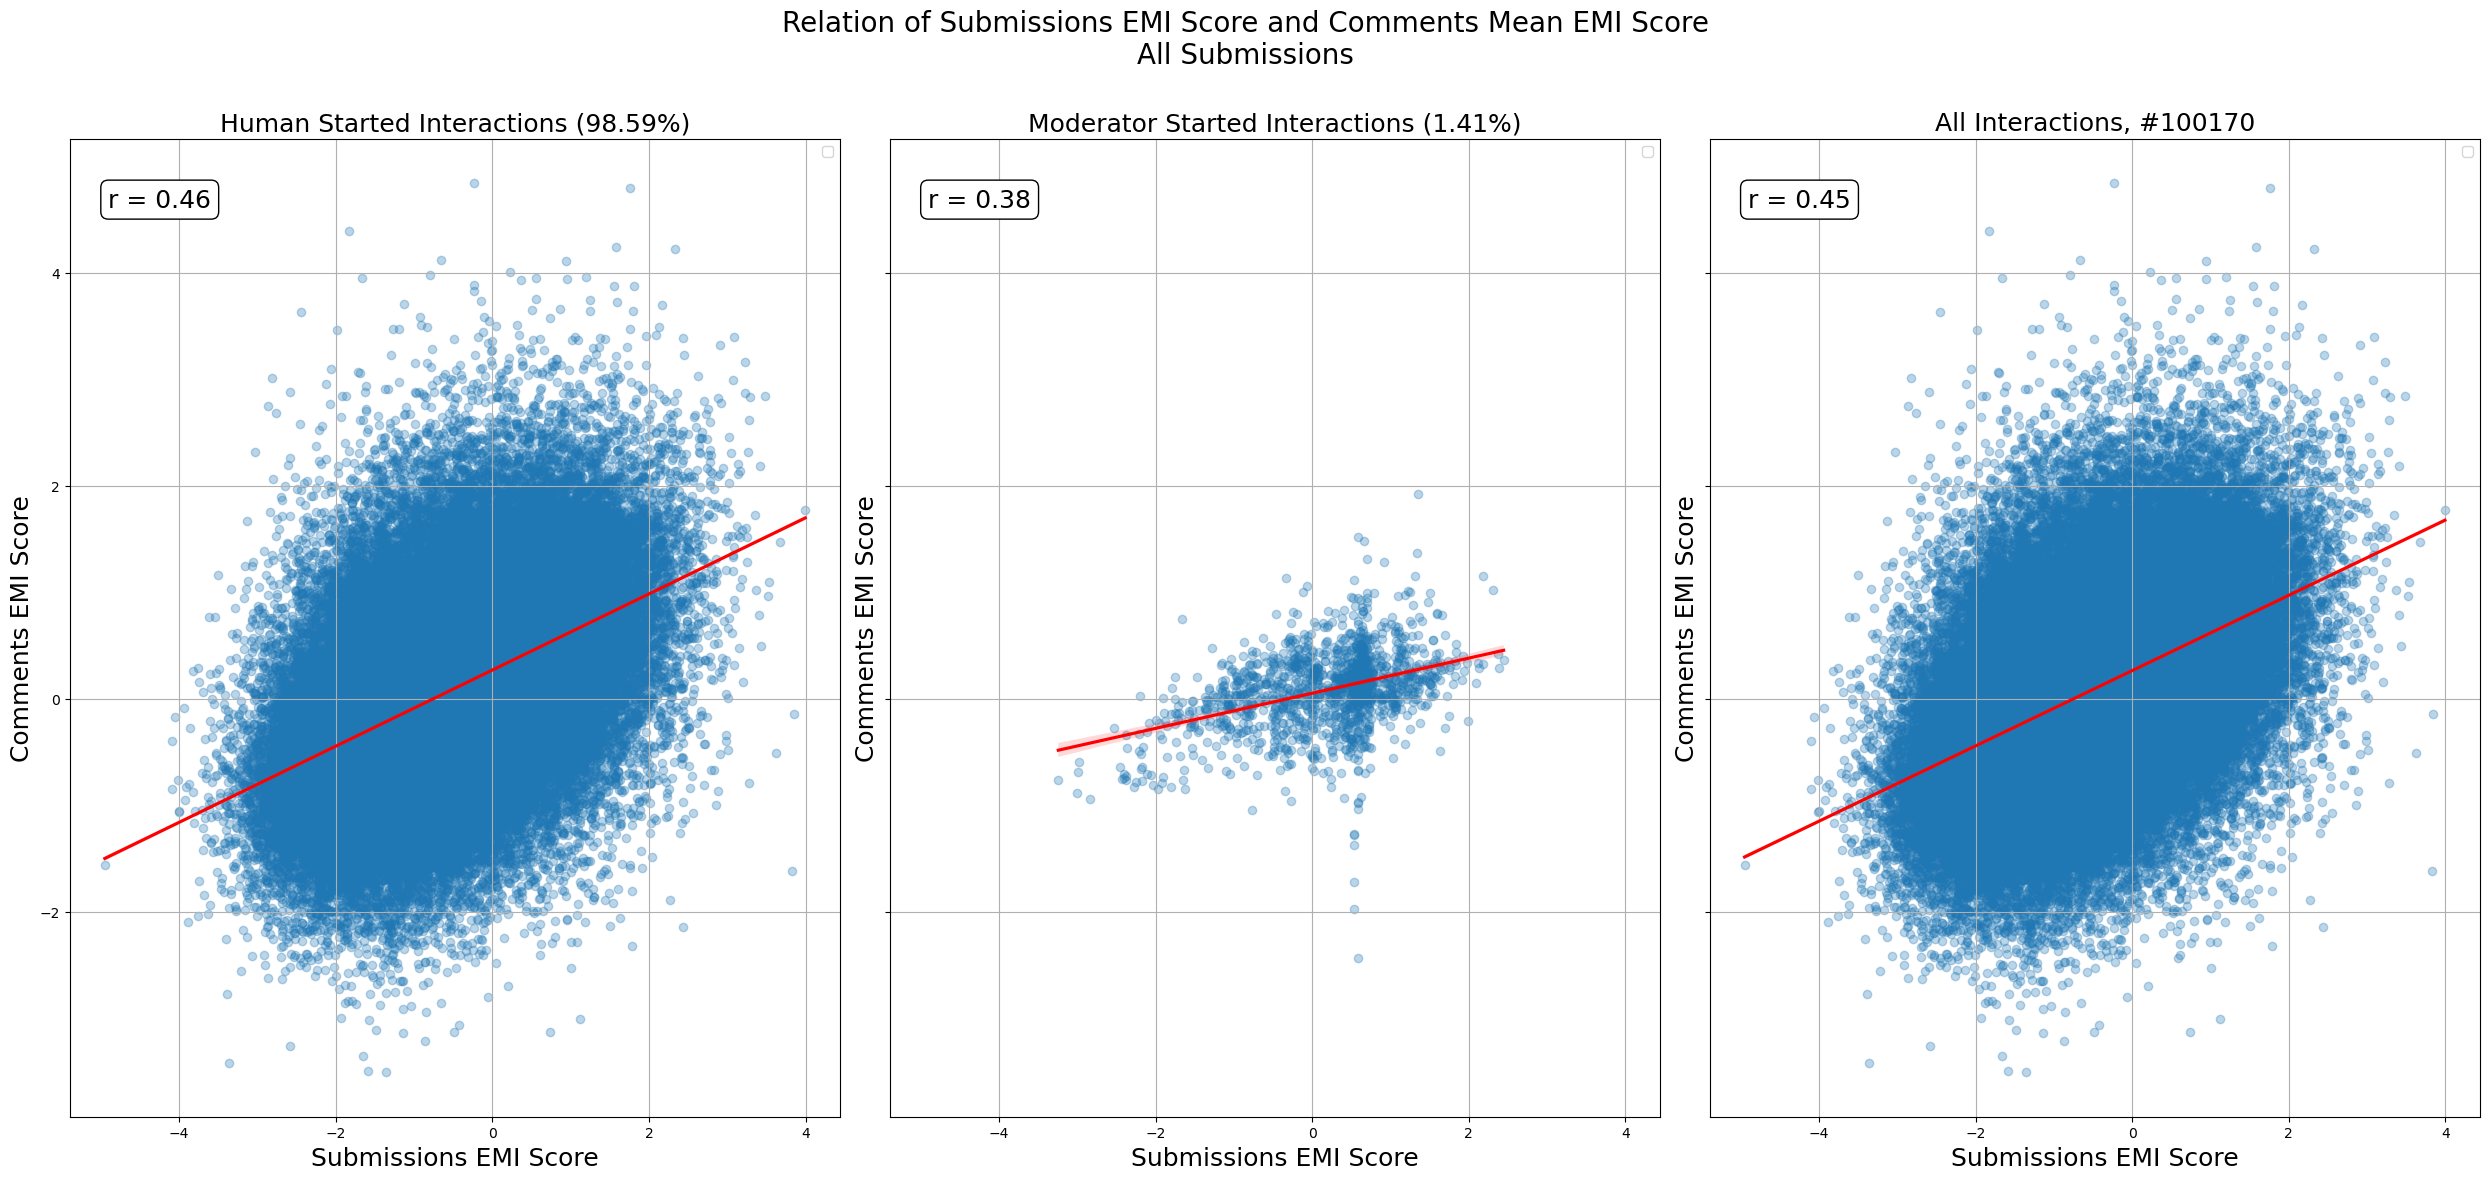

In [59]:
plot_sub_emi_vs_interact_emi(result_human_submission, result_mods_submission, result_all_submission,
                             "ft_EMI_z_submission_EMI", "ft_EMI_z_mean_comment_EMI", header_input = "Comments",
                             filter_mode = "None",
                             save_path="plots/Scatter_Submissions_EMI_Comments_EMI.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


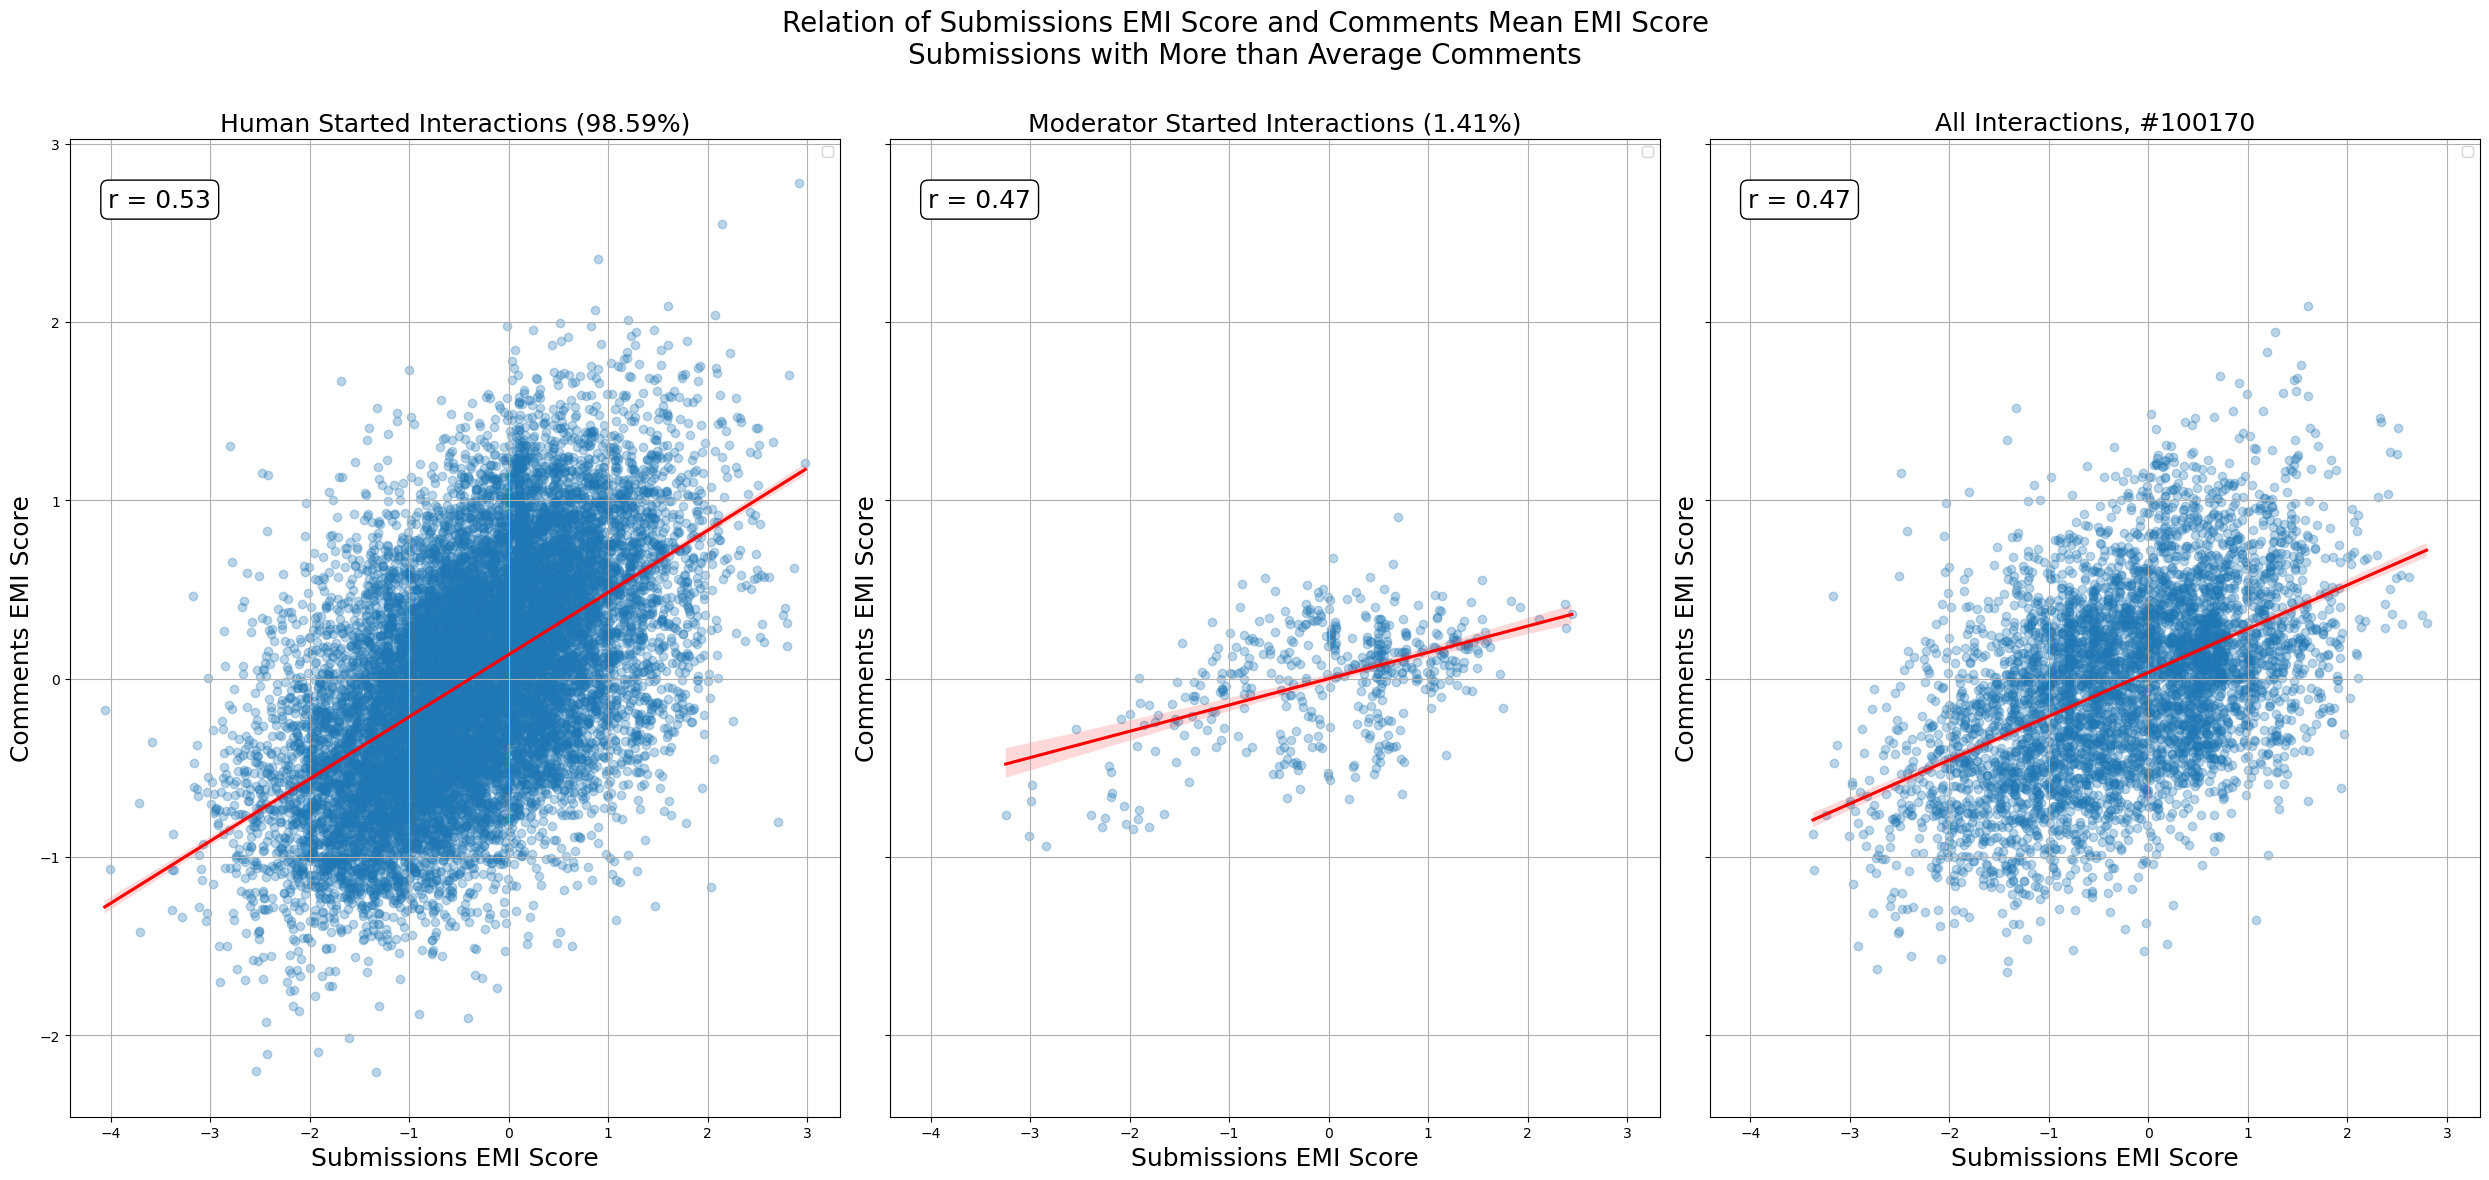

In [60]:
plot_sub_emi_vs_interact_emi(result_human_submission, result_mods_submission, result_all_submission,
                             "ft_EMI_z_submission_EMI", "ft_EMI_z_mean_comment_EMI", header_input = "Comments",
                             filter_mode = "mean",
                             save_path="plots/Scatter_Submissions_EMI_Comments_EMI_meanActivity.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


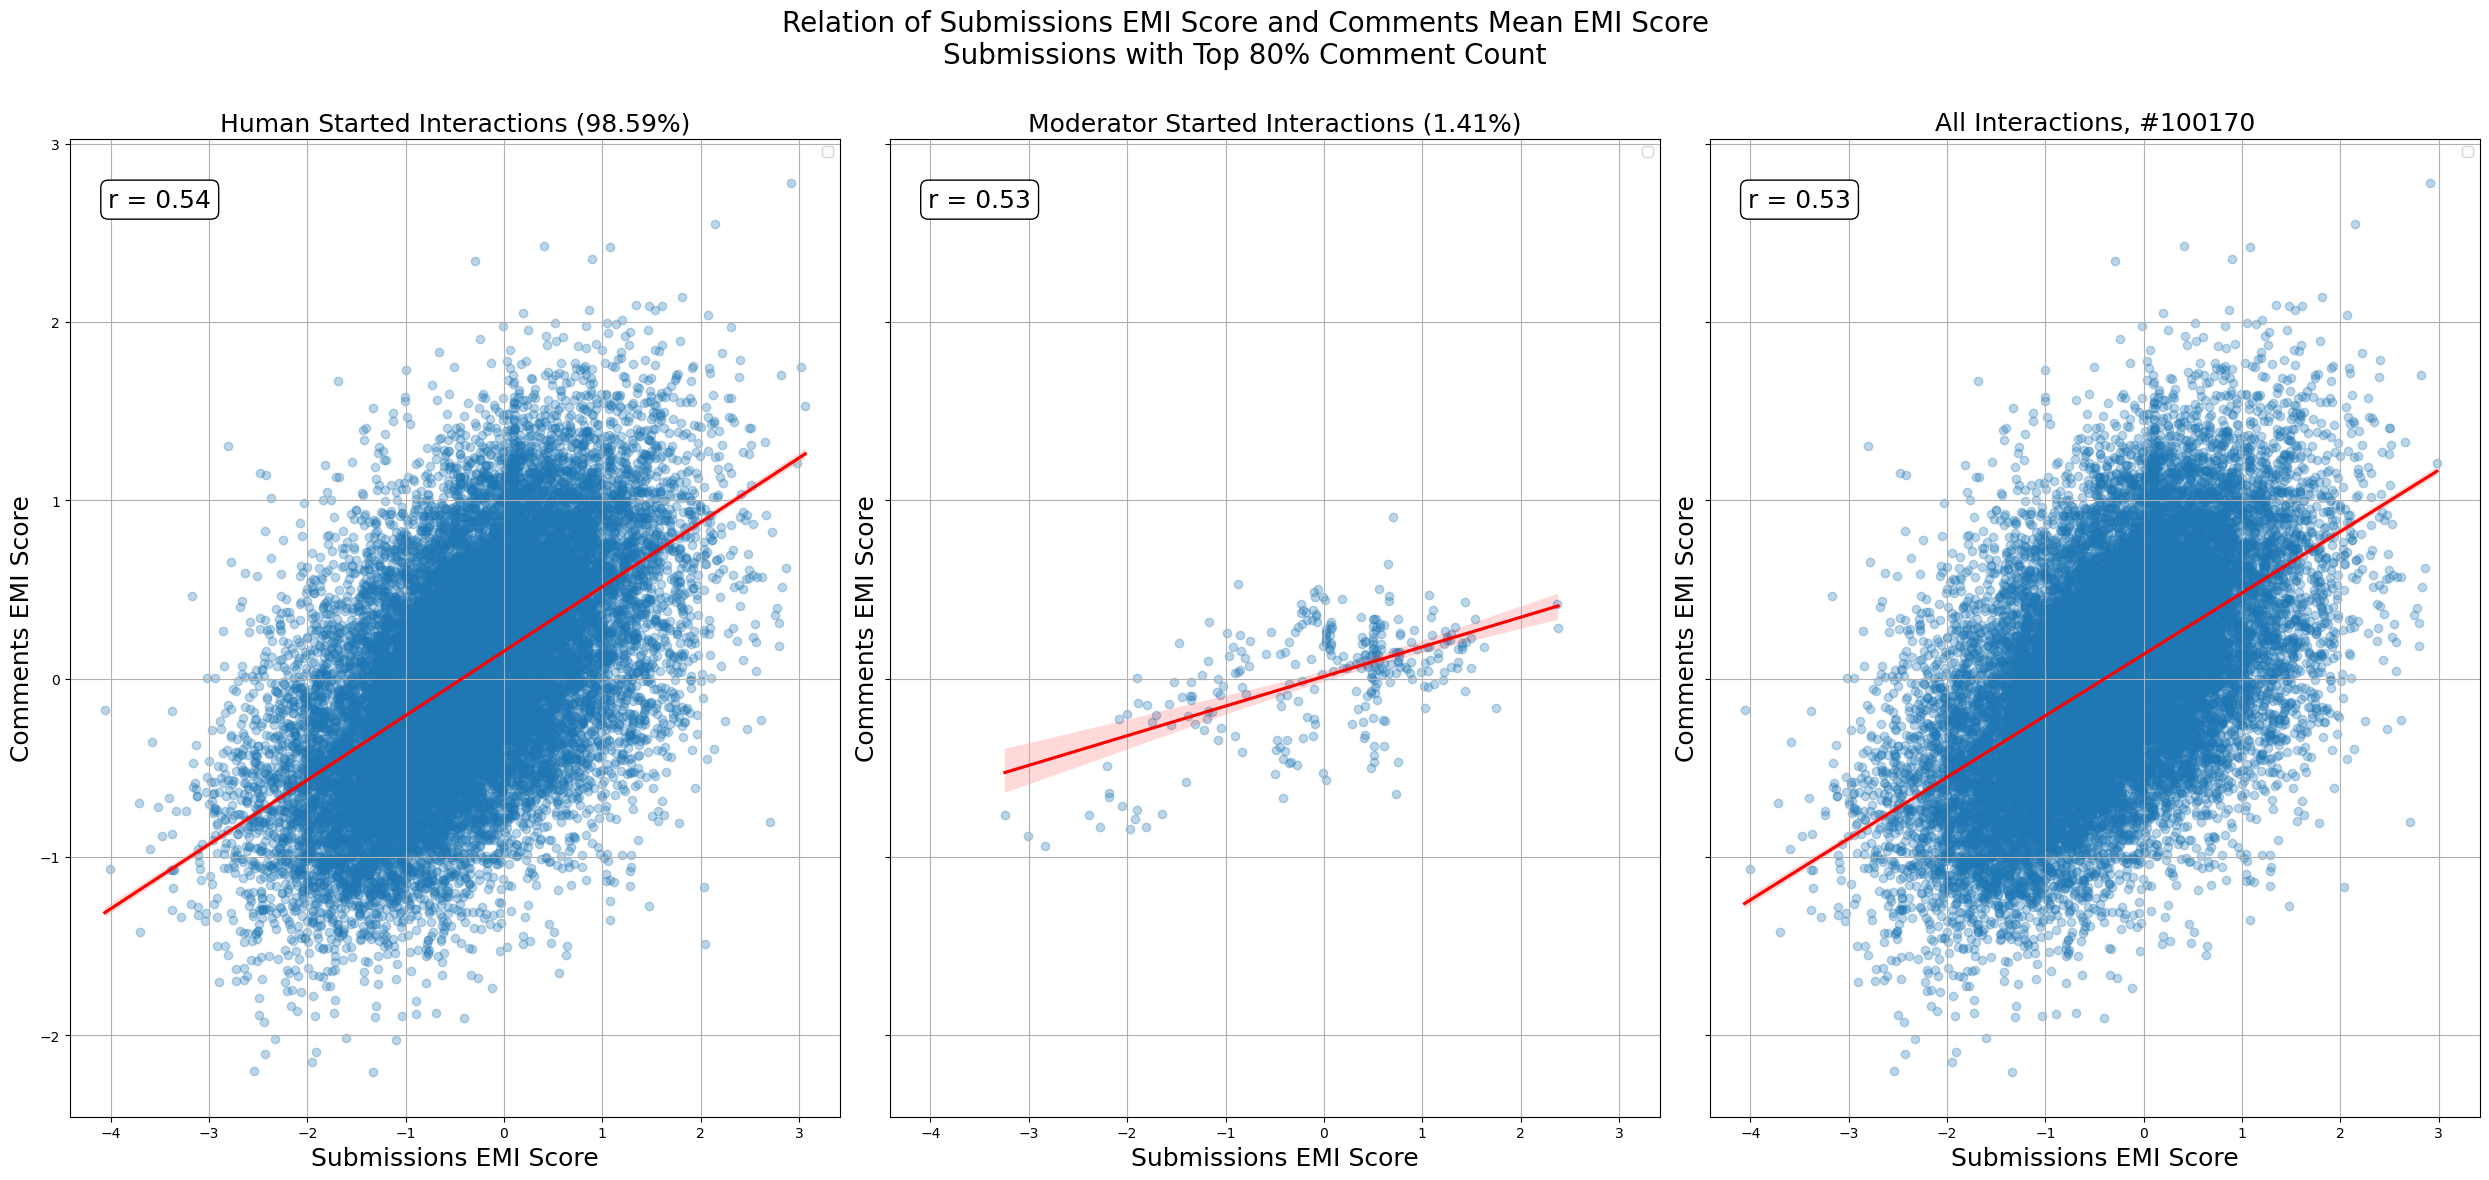

In [61]:
plot_sub_emi_vs_interact_emi(result_human_submission, result_mods_submission, result_all_submission,
                             "ft_EMI_z_submission_EMI", "ft_EMI_z_mean_comment_EMI", header_input = "Comments",
                             filter_mode = "quantile", quantile = 0.8,
                             save_path="plots/Scatter_Submissions_EMI_Comments_EMI_q8_Activity.png")

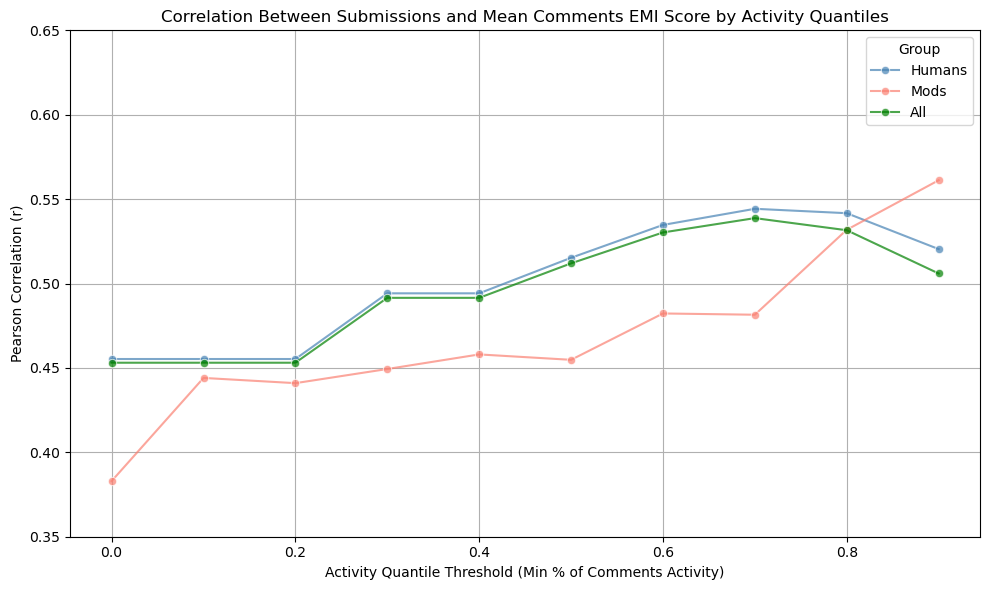

In [121]:
plot_correlation_by_activity_quantile(
    result_human_submission, result_mods_submission, result_all_submission,
    x_col = "ft_EMI_z_submission_EMI", y_col =  "ft_EMI_z_mean_comment_EMI",
    quantiles=np.linspace(0, 1, 11),
    filter_col = "nr_of_comments", filter_type = "Comments",
    header = "Correlation Between Submissions and Mean Comments EMI Score by Activity Quantiles",
    save_path = "plots/Correlation_Subm_Comments_EMI_by_Activity_Quantile.pdf"
)

**Interpretation**


* Higher submissions EMI leads to higher interactions EMI
* correlation rises, the higher the activity threshold
    * The more active a discussion, the stronger the relation of submission impacting the interactions
 
* Same for comments only
    * Higher submission EMI, higher comment EMI
    * Impact stronger, the more active 

***
***

## **H2: Comments Impact on Reply**


In [34]:
def majority_or_amb(labels):
    value_counts = labels.value_counts()
    if (value_counts == value_counts.max()).sum() > 1:
        return "amb"
    return value_counts.idxmax()


result_all_parent = (
    interactions_all.groupby("msg_id_parent")
    .agg(
        nr_of_replies=("msg_id_child", "count"),
        ft_EMI_z_comment_EMI=("finetuned_parent_len_EMI_z_trans", "first"),
        ft_EMI_z_mean_reply_EMI=("finetuned_child_len_EMI_z_trans", "mean"),
        label = ("predictions_ft", majority_or_amb)
    )
    .reset_index()
)


result_human_parent = (
    interactions.groupby("msg_id_parent")
    .agg(
        nr_of_replies=("msg_id_child", "count"),
        ft_EMI_z_comment_EMI=("finetuned_parent_len_EMI_z_trans", "first"),
        ft_EMI_z_mean_reply_EMI=("finetuned_child_len_EMI_z_trans", "mean"),
        label = ("predictions_ft", majority_or_amb)
    )
    .reset_index()
)

result_mods_parent = (
    mod_interactions.groupby("msg_id_parent")
    .agg(
        nr_of_replies=("msg_id_child", "count"),
        ft_EMI_z_comment_EMI=("finetuned_parent_len_EMI_z_trans", "first"),
        ft_EMI_z_mean_reply_EMI=("finetuned_child_len_EMI_z_trans", "mean"),
        label = ("predictions_ft", majority_or_amb)
    )
    .reset_index()
)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


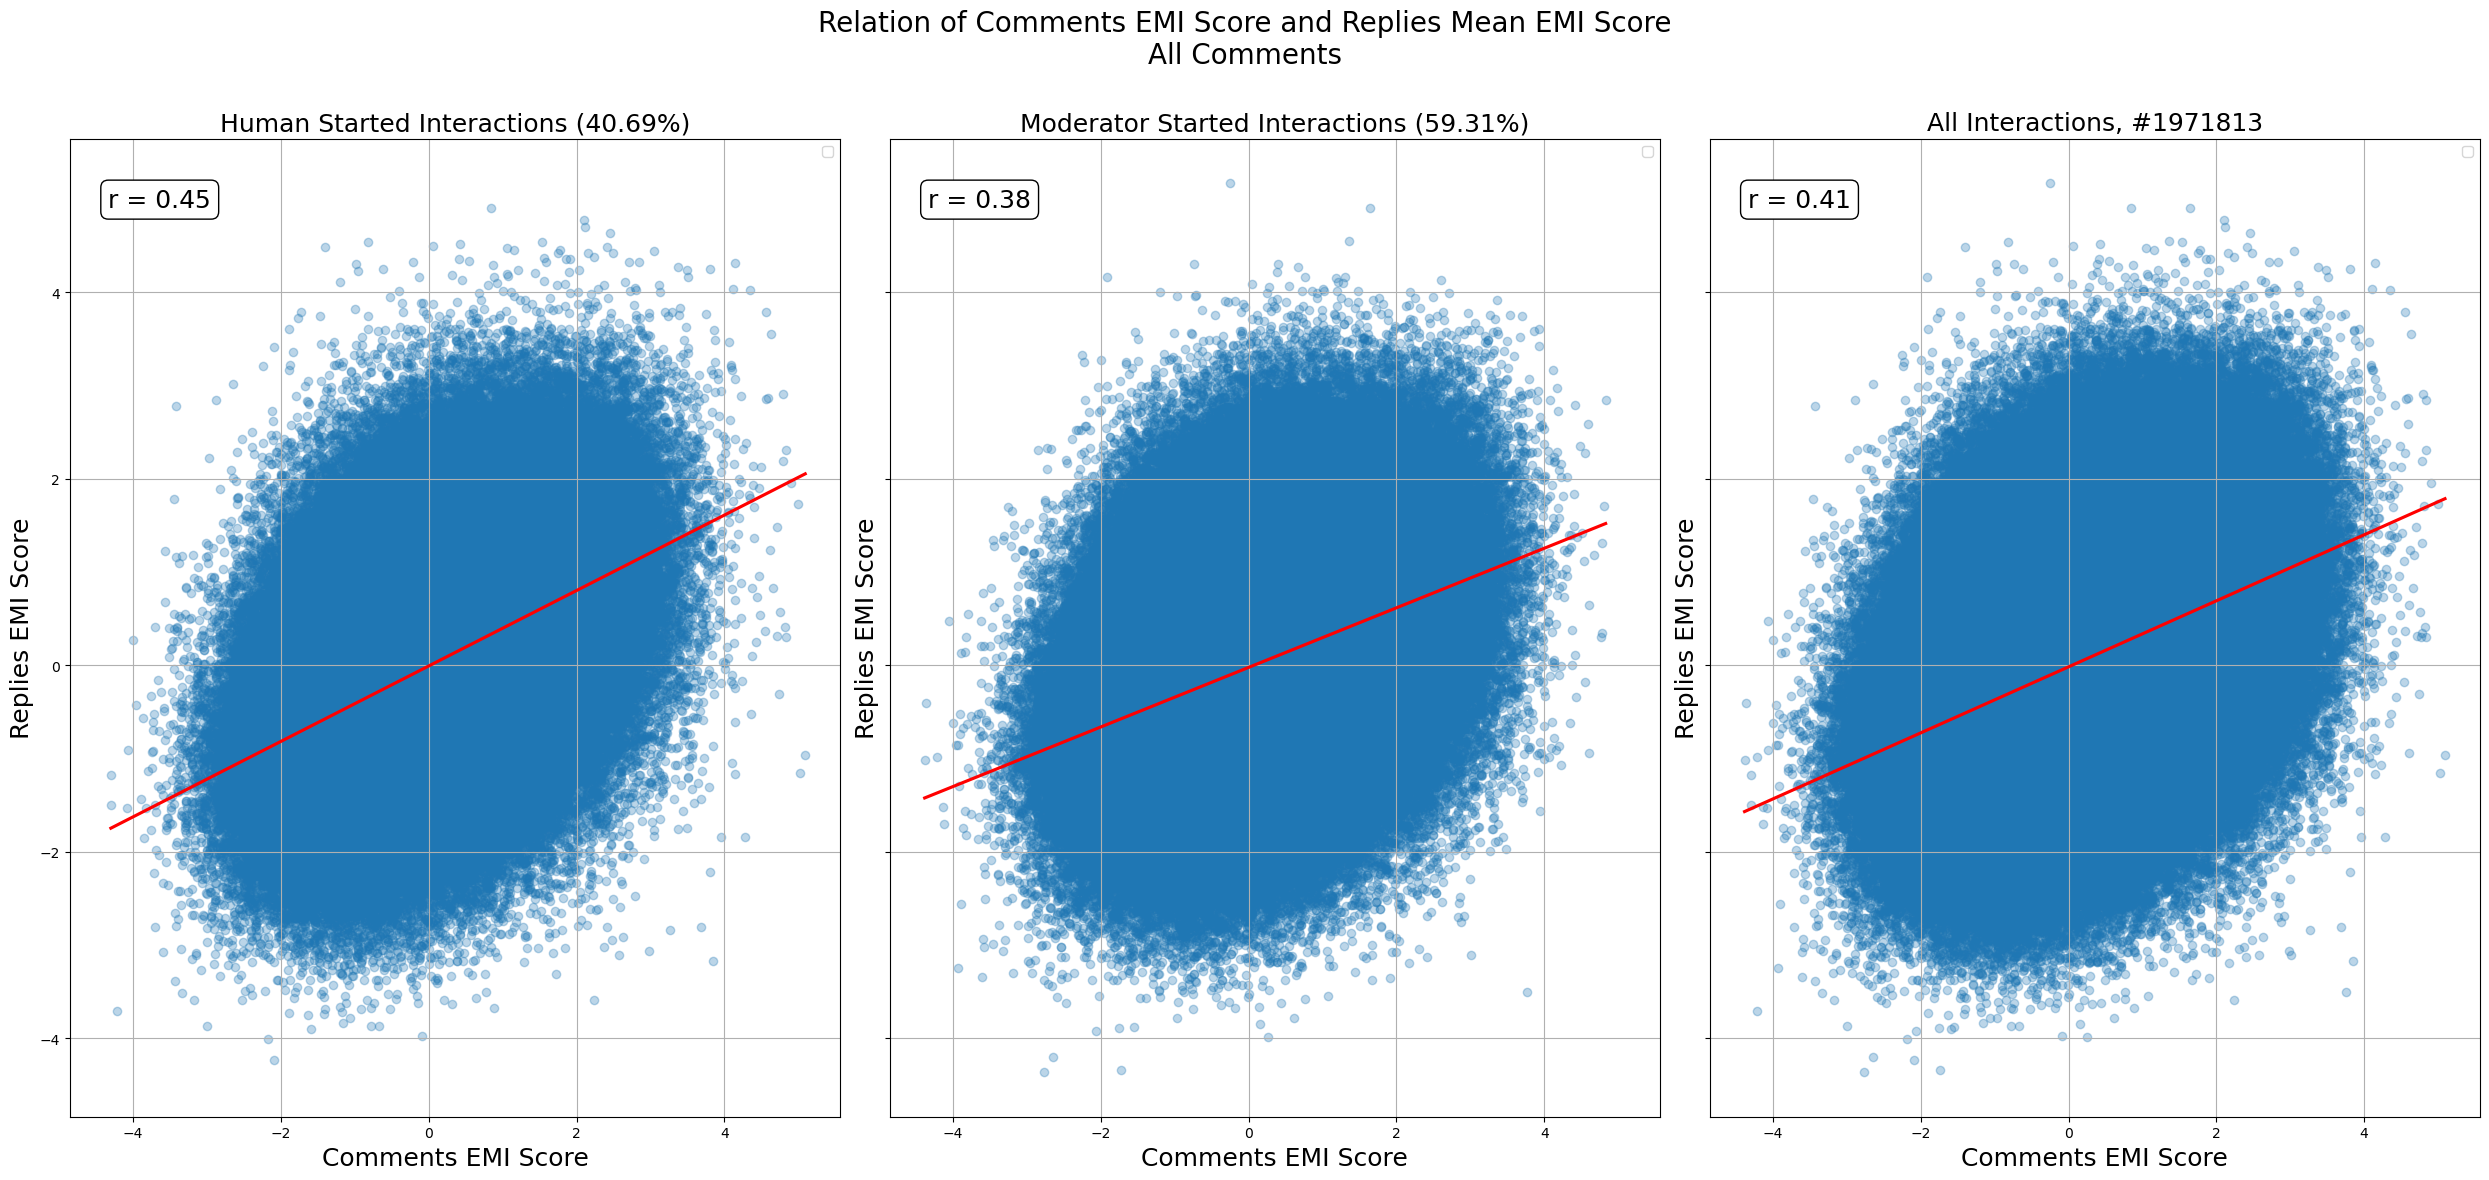

In [68]:
plot_sub_emi_vs_interact_emi(result_human_parent, result_mods_parent, result_all_parent,
                             "ft_EMI_z_comment_EMI", "ft_EMI_z_mean_reply_EMI", header_input = "Replies",
                             filter_mode = "None",
                             filter_col = "nr_of_replies",
                             filter_type = "Comments",
                             save_path="plots/Scatter_Parents_EMI_Reply_EMI.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


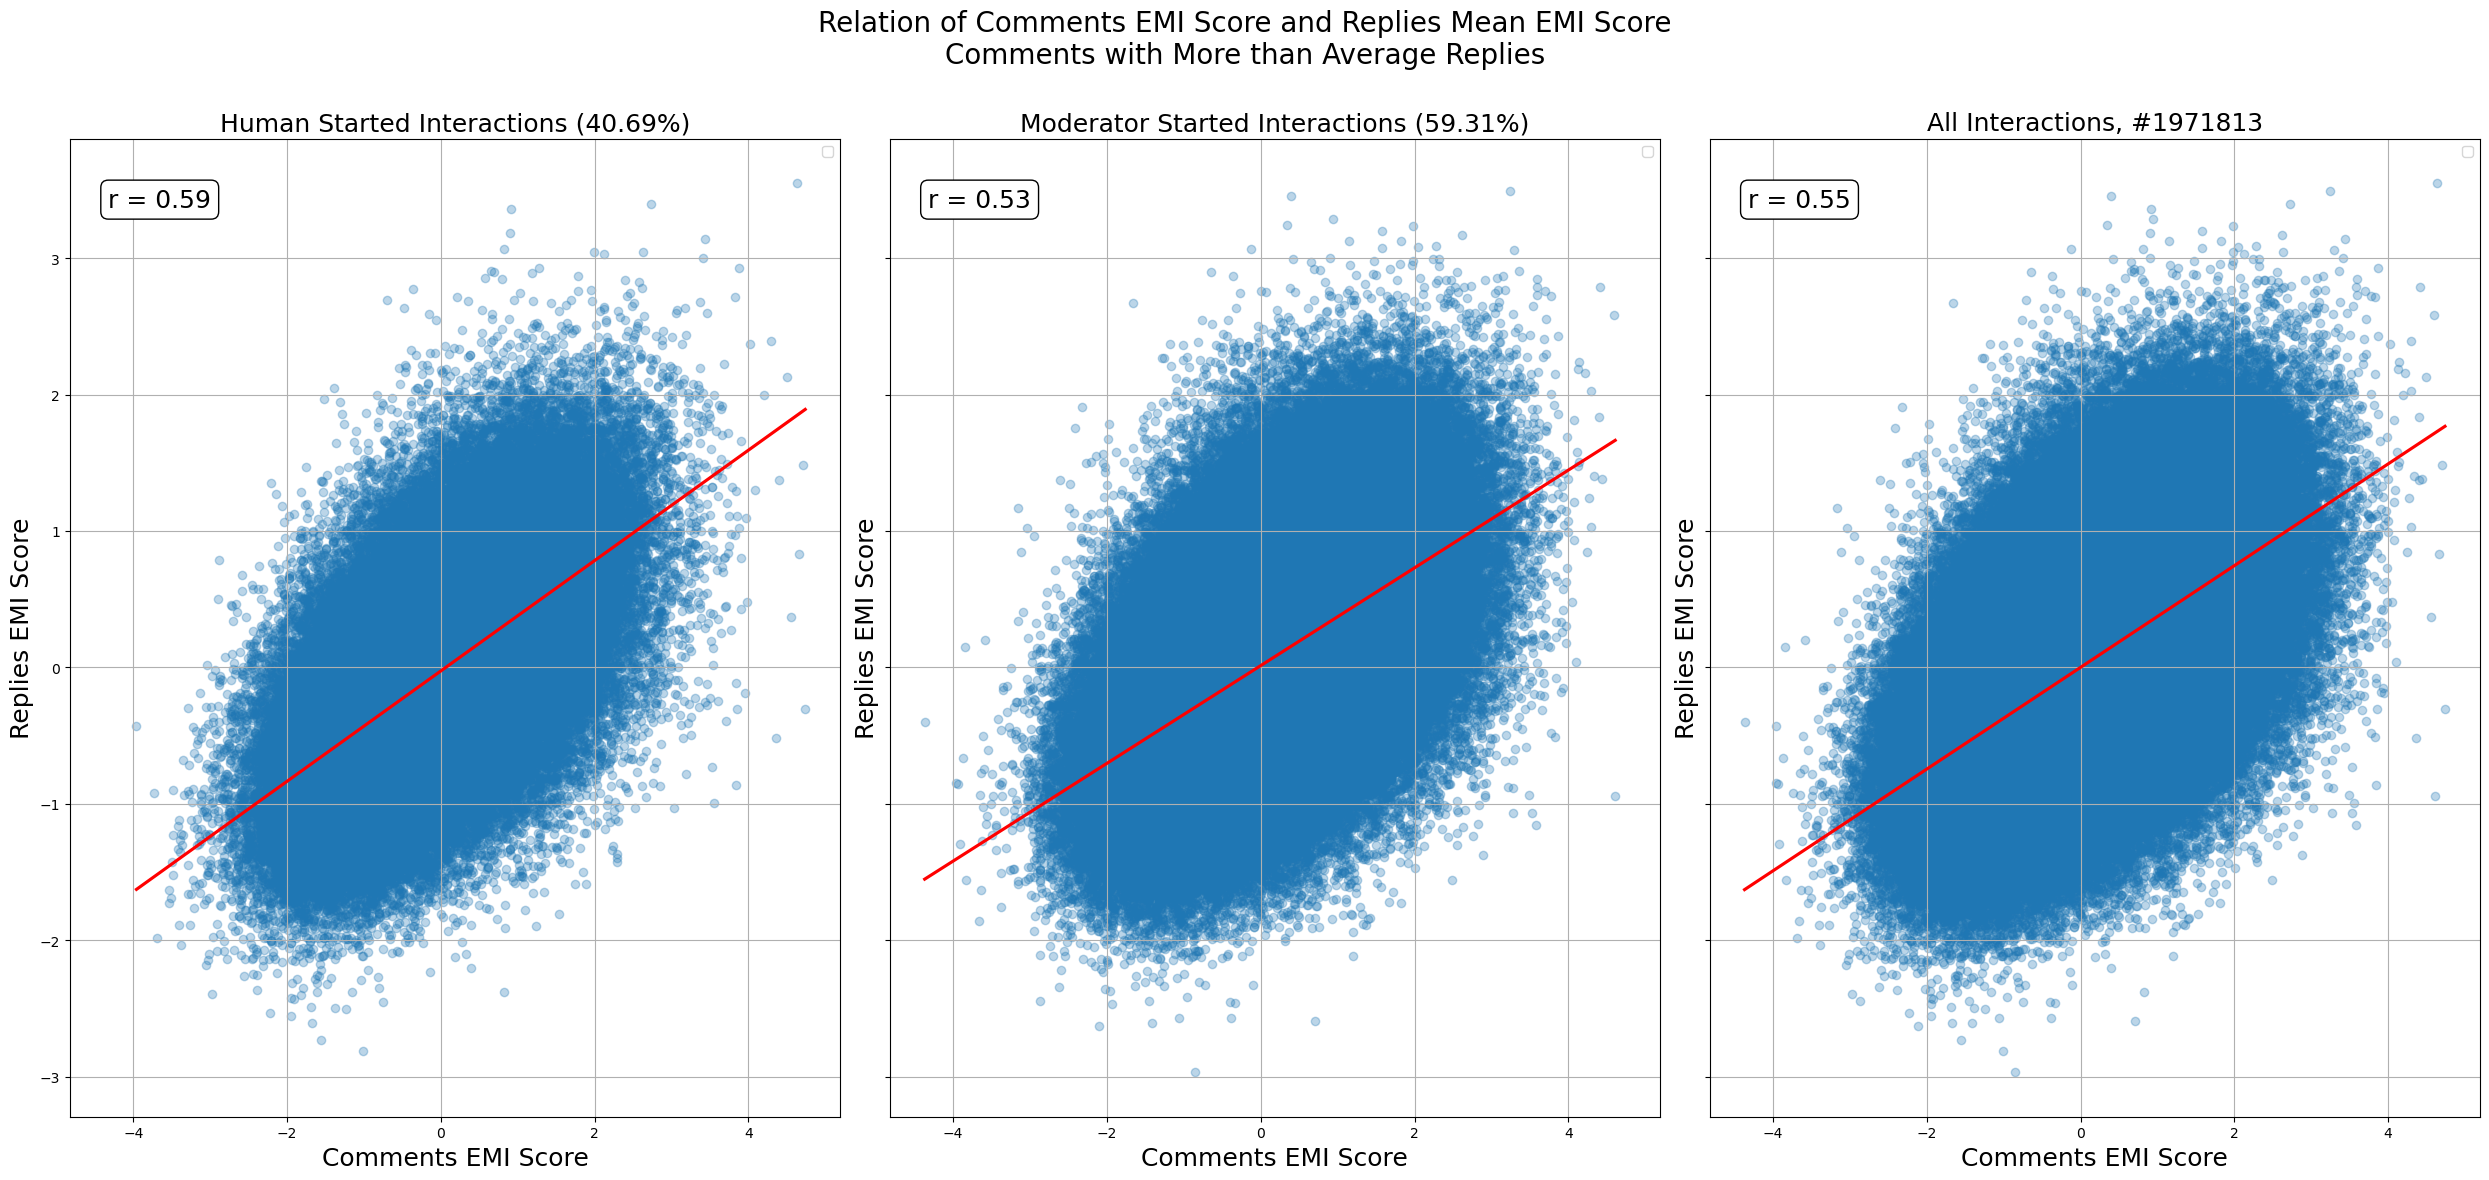

In [69]:
plot_sub_emi_vs_interact_emi(result_human_parent, result_mods_parent, result_all_parent,
                              "ft_EMI_z_comment_EMI", "ft_EMI_z_mean_reply_EMI", header_input = "Replies",
                             filter_mode = "mean",
                             filter_col = "nr_of_replies",
                             filter_type = "Comments",
                             save_path="plots/Scatter_Parents_EMI_Reply_EMI_meanActivity.png")

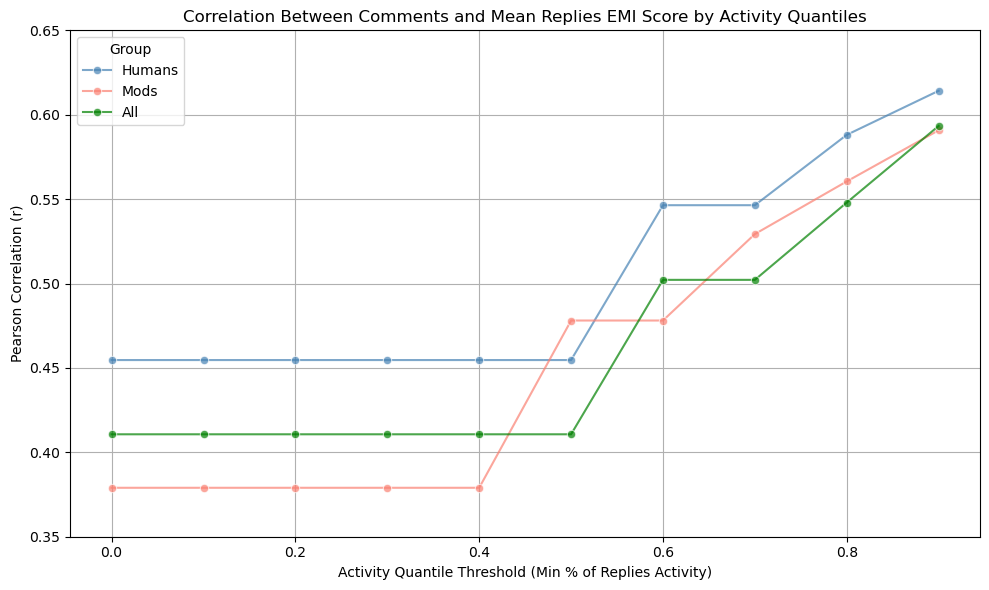

In [122]:
plot_correlation_by_activity_quantile(
    result_human_parent, result_mods_parent, result_all_parent,
    x_col = "ft_EMI_z_comment_EMI", y_col =  "ft_EMI_z_mean_reply_EMI",
    quantiles=np.linspace(0, 1, 11),
    filter_col = "nr_of_replies", filter_type = "Replies",
    header = "Correlation Between Comments and Mean Replies EMI Score by Activity Quantiles",
    save_path = "plots/Correlation_Comments_Replies_EMI_by_Activity_Quantile.pdf"
)

**Interpretation:**

* Higher parent EMI, higher replies EMI
* Stronger correlation, the more replies, a comment got